In [1]:
from scipy.stats import ks_2samp
import numpy as np
n = 1000
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)
z = np.random.normal(1.1, 0.9, n)

import pandas as pd
%matplotlib inline

In [2]:
df = pd.DataFrame(x)
df.rename(columns = {df.columns[0] : 'value'}, inplace=True)
df = df.sort_values(by='value', ascending=True).reset_index(drop=True)
df['prob'] = 1 / n

df.head()

,value,prob
0,-3.092089,0.001
1,-2.730707,0.001
2,-2.667137,0.001
3,-2.529403,0.001
4,-2.449066,0.001


In [3]:
df_y = pd.DataFrame(y)
df_y.rename(columns = {df_y.columns[0] : 'value'}, inplace=True)
df_y = df_y.sort_values(by='value', ascending=True).reset_index(drop=True)
df_y['prob'] = 1 / n
df_y.head()

,value,prob
0,-3.001695,0.001
1,-2.888795,0.001
2,-2.522847,0.001
3,-2.507202,0.001
4,-2.498809,0.001


In [4]:
x_y_df = df.merge(df_y, how='outer', left_on='value', right_on='value').sort_values(by='value')
x_y_df.head()

,value,prob_x,prob_y
0,-3.092089,0.001,NaN
1000,-3.001695,NaN,0.001
1001,-2.888795,NaN,0.001
1,-2.730707,0.001,NaN
2,-2.667137,0.001,NaN


In [5]:
x_y_df = x_y_df.fillna(0)

In [6]:
x_y_df['cum_sum_x'] = x_y_df['prob_x'].cumsum()
x_y_df.head()

,value,prob_x,prob_y,cum_sum_x
0,-3.092089,0.001,0.000,0.001
1000,-3.001695,0.000,0.001,0.001
1001,-2.888795,0.000,0.001,0.001
1,-2.730707,0.001,0.000,0.002
2,-2.667137,0.001,0.000,0.003


In [7]:
x_y_df['cum_sum_y'] = x_y_df['prob_y'].cumsum()
x_y_df.head()

,value,prob_x,prob_y,cum_sum_x,cum_sum_y
0,-3.092089,0.001,0.000,0.001,0.000
1000,-3.001695,0.000,0.001,0.001,0.001
1001,-2.888795,0.000,0.001,0.001,0.002
1,-2.730707,0.001,0.000,0.002,0.002
2,-2.667137,0.001,0.000,0.003,0.002


In [8]:
minimum_value = x_y_df.value.min()
maximum_value = x_y_df.value.max()

In [9]:
x_y_df = x_y_df.reset_index(drop=True)

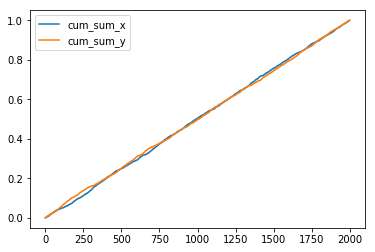

In [10]:
x_y_df[['cum_sum_x', 'cum_sum_y']].plot()

### Here the plot doesn't have the good values because we need to evaluate the functions in the values and it is evaluating it in the index. So we would need to divide the range into equal numbers and plot

In [11]:
ks_2samp(x, y)

Ks_2sampResult(statistic=0.02800000000000001, pvalue=0.8228413328247733)

In [12]:
df_z = pd.DataFrame(z)
df_z.rename(columns = {df_z.columns[0] : 'value'}, inplace=True)
df_z = df_z.sort_values(by='value', ascending=True).reset_index(drop=True)
df_z['prob'] = 1 / n
df_z.head()

,value,prob
0,-2.065958,0.001
1,-1.886271,0.001
2,-1.706746,0.001
3,-1.682051,0.001
4,-1.550423,0.001


In [13]:
x_z_df = df.merge(df_z, how='outer', left_on='value', right_on='value').sort_values(by='value')
x_z_df = x_z_df.fillna(0)

In [14]:
x_z_df['cum_sum_x'] = x_z_df['prob_x'].cumsum()
x_z_df['cum_sum_y'] = x_z_df['prob_y'].cumsum()
x_z_df = x_z_df.reset_index(drop=True)

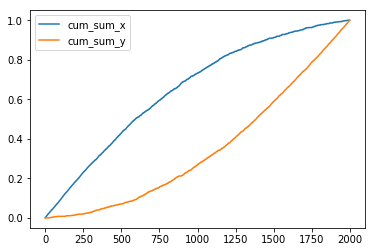

In [15]:
x_z_df[['cum_sum_x', 'cum_sum_y']].plot()

In [16]:
ks_2samp(x, z)

Ks_2sampResult(statistic=0.473, pvalue=1.1171171676809492e-98)